In [ ]:
from collections import Counter
from sklearn.cluster import KMeans
from scipy.spatial import KDTree
from webcolors import hex_to_rgb, rgb_to_hex
import numpy as np
import matplotlib.pyplot as plt

# Define a dictionary of colours with their corresponding hex values
COLOURS = {
    "Red": ["#FF0000", '#B22222', '#DC143C', '#800000','#A52A2A',  '#8B0000', '#B71C1C', "#FF6347", "#b6524a", "#d83d1a"],
    "Green": ['#008000', '#00FF00', '#228B22', '#006400', "#32CD32", '#2E8B57', "#c5f7c1", "#394a40"],
    "Blue": ["#0000FF", '#1E90FF', '#4169E1', '#00008B', '#00CED1',"#00FFFF", "#008080", "#87CEEB",  "#ADD8E6", "#c1f4f7","#b8c8cf",
              "#9cb1b2", "#4872a0","#6e87a2"],
    "Yellow": ["#FFFF00", "#D2AB4C","#808000", '#FFD700', '#FFA500', '#FFC300', '#F0E68C', "#F7ecc1", "#F5DEB3", "#D2AB4C","#a89e7d",
               "#e0b550","#d7c669"],
    "Pink": ["#FF00FF", "#C35885", "#D4A8C2","#FFC0CB", "#EE82EE", '#FFC0CB', '#FF69B4', '#FF1493','#FF6EB4', '#FF91A4', "#f5c1f7",
             "#8f5b7e","#c2abb1","#ca9985","#dac0d8","#e1c5ba"],
    "Background": ["#000000"],
    "Black": ['#010101'],
    "White": ['#FFFFFF',"#f1e9e4"],
    "Grey": ['#808080', '#A9A9A9', '#D3D3D3', "#4F4D4A","#403c37", "#333236", "#c4bfb9","#c6c2c0","#bdae9c","#a29c92","#b9aeb4","#e1d2c0",
             "#6c6c6f","#6e6e71"],
    "Purple": ["#800080", "#4B0082", '#9932CC', '#8A2BE2', '#9400D3','#9370DB', '#6A5ACD', '#9932CC', "#c5c1f7","#5e356b","#6d5965"],
    "Orange": ['#fa7600', '#b5510e', '#FF7F50', '#FF4500', '#FF9100', '#FF6E40', '#FF5722',  '#E65100'],
    "Brown": ["#4a2a0a", '#8B4513', '#654321', '#9c6a38', '#423527', '#cc9c6e', "#4e3d31","#ac8171", "#deaa5c", "#dfccb0","#6e6144",
              "#c4a37f", "#bb8f7c","#c16c3f","#5e4045"]
}

# Function to display two images side by side for comparison
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(8,4))

    ax[0].imshow(img_1)
    ax[1].imshow(img_2)

    ax[0].axis('off') 
    ax[1].axis('off')

    f.tight_layout()

    plt.show()

# Function to convert RGB values to their closest colour names
def convert_rgb_to_names(rgb_tuple):
    names, rgb_values = zip(*[(color_name, hex_to_rgb(color_hex)) for color_name, x in COLOURS.items() for color_hex in x])
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)

    return names[index]

# Function to calculate the percentage of each colour in the image
def palette_perc(k_cluster):
    width = 300

    # Initialize the palette as a 3D array of zeros
    palette = np.zeros((50, width, 3), np.uint8)
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_)

    # Calculate the percentage of each colour
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)

    perc = dict(sorted(perc.items()))

    # Create a list of tuples where each tuple is a colour name, its hex value, and its percentage
    colour = [[convert_rgb_to_names(colour.astype(int)), rgb_to_hex(colour.astype(int)), perc[i]] for i,colour in enumerate(k_cluster.cluster_centers_)]

    step = 0
    # Fill the palette with colours
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)

    return palette, colour

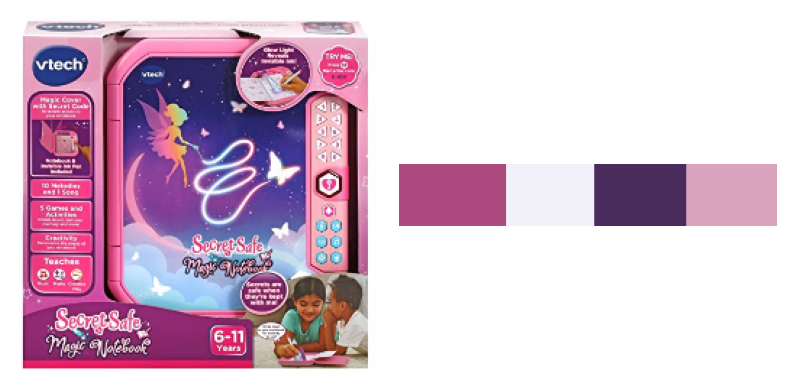

[['Pink', '#ac4a80', 0.28], ['White', '#f2f0f8', 0.23], ['Purple', '#492b5c', 0.24], ['Pink', '#d9a3be', 0.25]]


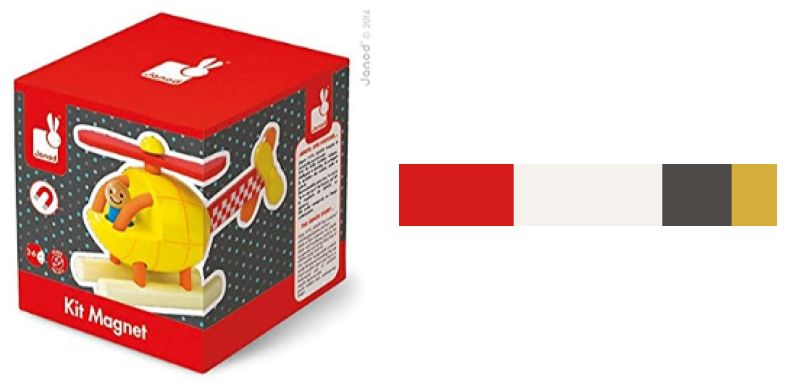

[['Red', '#d61c1a', 0.3], ['White', '#f5f2ee', 0.39], ['Grey', '#4d4a48', 0.18], ['Yellow', '#d6ae3e', 0.13]]


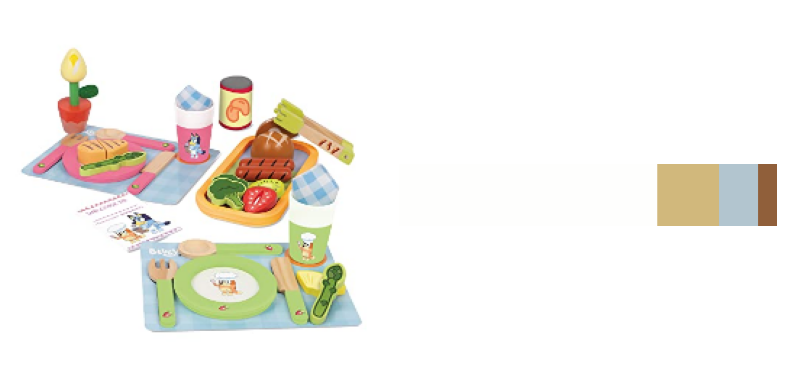

[['White', '#fefefd', 0.68], ['Yellow', '#d1b87c', 0.16], ['Blue', '#b2c5cf', 0.1], ['Brown', '#905f3a', 0.06]]


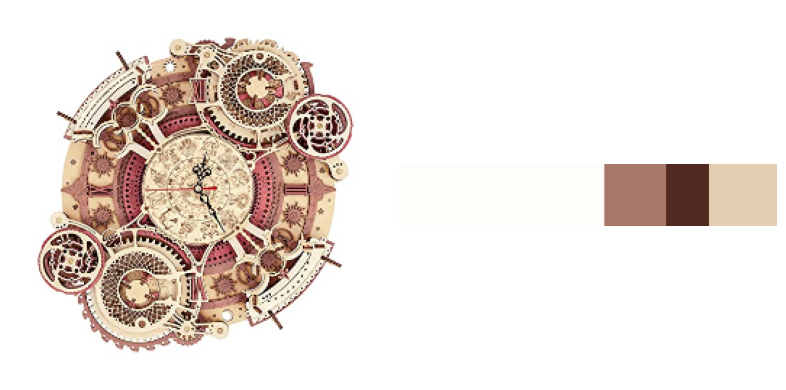

[['White', '#fefdf9', 0.54], ['Brown', '#a87767', 0.16], ['Brown', '#512920', 0.11], ['Brown', '#e4ceb1', 0.19]]


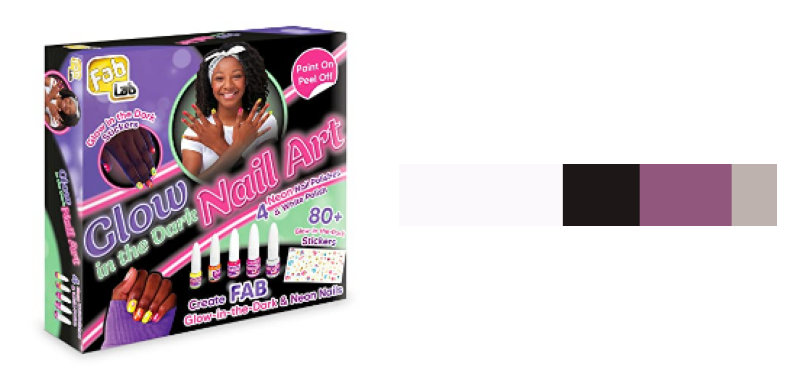

[['White', '#fbf9fb', 0.43], ['Black', '#1e1717', 0.2], ['Pink', '#91577d', 0.24], ['Grey', '#beb2af', 0.13]]


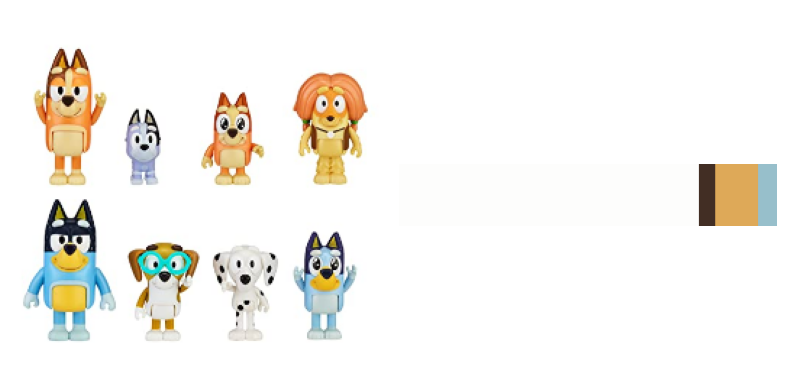

[['White', '#fdfdfc', 0.79], ['Brown', '#422e24', 0.04], ['Brown', '#dea958', 0.11], ['Blue', '#97bfcb', 0.07]]


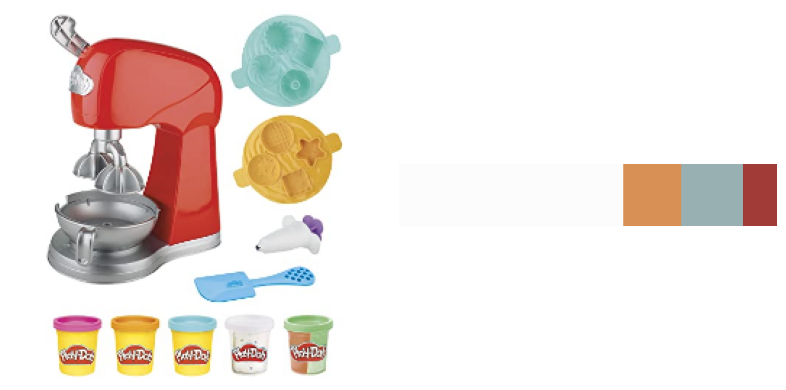

[['White', '#fcfcfc', 0.59], ['Brown', '#d99055', 0.15], ['Blue', '#98b0b1', 0.16], ['Red', '#a03b37', 0.1]]


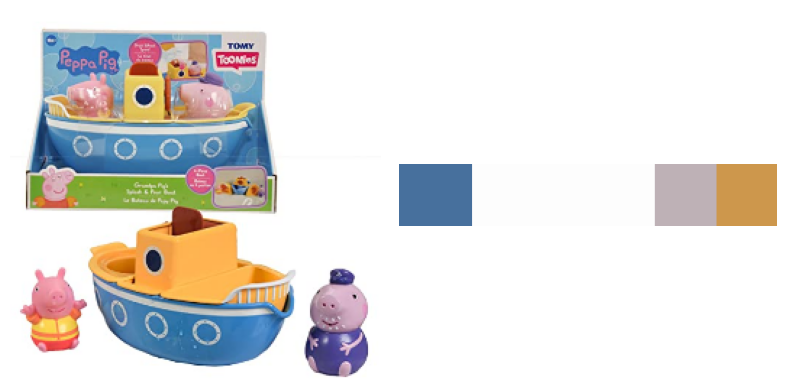

[['Blue', '#47709d', 0.19], ['White', '#fdfdfd', 0.48], ['Grey', '#beb1b6', 0.16], ['Yellow', '#cd974c', 0.17]]


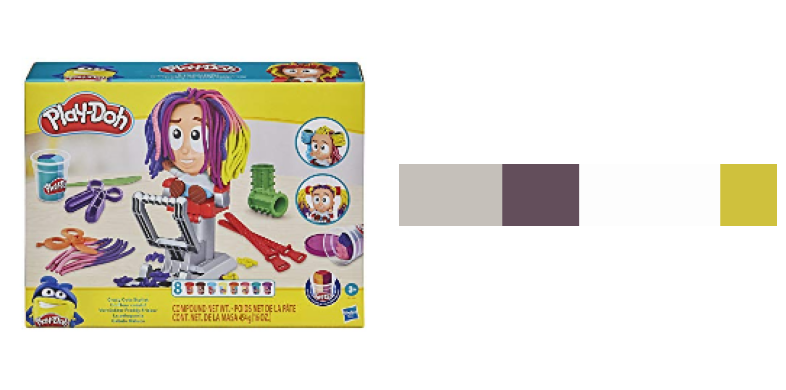

[['Grey', '#c5c0ba', 0.27], ['Purple', '#634e5b', 0.2], ['White', '#fdfdfd', 0.37], ['Yellow', '#cfc13d', 0.16]]


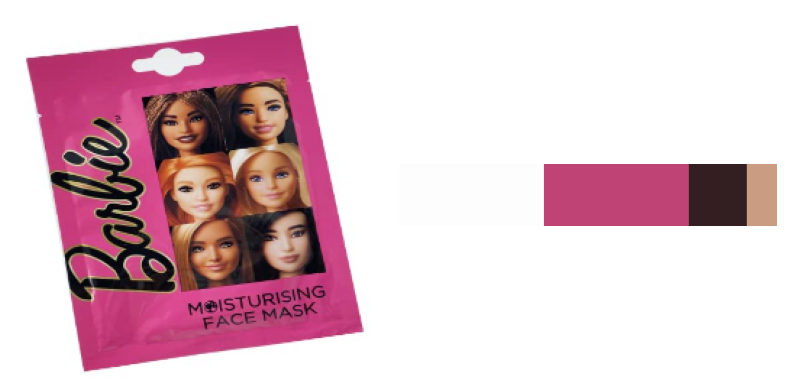

[['White', '#fdfdfd', 0.38], ['Pink', '#bf4375', 0.38], ['Brown', '#331f21', 0.15], ['Pink', '#ca9c82', 0.09]]


In [30]:
import cv2
import os

directory = 'data'

clt = KMeans(n_clusters = 4, n_init=10)

# Loop over each image in the directory
for i,img_path in enumerate(os.listdir(directory)):
    try:
        # Load the image
        img = cv2.imread(f'{directory}/{img_path}')
        img = cv2.resize(img,(256,256))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Calculate the palette and the colors of the image
        clt_1 = clt.fit(img.reshape(-1, 3))
        palette, colors = palette_perc(clt_1)

        # Display the image and its palette
        show_img_compar(img, palette)

        print(colors)

    except Exception as e:
        print(e)